<a href="https://colab.research.google.com/github/KubaWinsztal/MachineLearning/blob/main/PD7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Scenario A: Closed-form solution for optimal λ

We aim to find the optimal constant prediction λ that minimizes the binary cross-entropy loss over all examples:

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^n L(y_i, \lambda),
$$

where the loss is:

$$
L(y, \lambda) = -y \log \sigma(\lambda) - (1 - y) \log (1 - \sigma(\lambda)),
$$

and the sigmoid function is:

$$
\sigma(\lambda) = \frac{1}{1 + e^{-\lambda}}.
$$

Let the dataset contain:

- \( m \) positive labels (i.e., \( y_i = 1 \)),
- \( k \) negative labels (i.e., \( y_i = 0 \)),

so that \( n = m + k \).

Total loss becomes:

$$
\mathcal{L}(\lambda) = -m \log \sigma(\lambda) - k \log (1 - \sigma(\lambda)).
$$

We differentiate with respect to \( \lambda \):

$$
\frac{d\mathcal{L}}{d\lambda} = -m \frac{\sigma'(\lambda)}{\sigma(\lambda)} + k \frac{\sigma'(\lambda)}{1 - \sigma(\lambda)} = 0,
$$

where:

$$
\sigma'(\lambda) = \sigma(\lambda)[1 - \sigma(\lambda)].
$$


Substituting:

$$
-m (1 - \sigma(\lambda)) + k \sigma(\lambda) = 0.
$$

Simplifying:

$$
m \sigma(\lambda) + k \sigma(\lambda) = m \quad \Rightarrow \quad (m + k) \sigma(\lambda) = m.
$$

Hence:

$$
\sigma(\lambda^*) = \frac{m}{m + k} \quad \Rightarrow \quad \lambda^* = \log \left( \frac{m}{k} \right).
$$

**Interpretation:**  
This optimal constant logit \( \lambda^* \) corresponds to the log-odds of the positive to negative labels in the dataset.


**SCENARIO B**


We start from the total loss in the additive-shift scenario:

$$
\mathcal{L}(\lambda)
= \sum_{i=1}^n \Bigl[-y_i \ln\sigma(f_i + \lambda)\;-\;(1 - y_i)\ln\bigl(1 - \sigma(f_i + \lambda)\bigr)\Bigr],
\quad
\sigma(z)=\frac{1}{1+e^{-z}}.
$$

Differentiate with respect to \(\lambda\) (letting \(z_i = f_i+\lambda\), so \(dz_i/d\lambda=1\)):

$$
\frac{d\mathcal{L}}{d\lambda}
= \sum_{i=1}^n \Bigl[
  -y_i\,\frac{d}{d\lambda}\ln\sigma(z_i)
  -(1 - y_i)\,\frac{d}{d\lambda}\ln\bigl(1 - \sigma(z_i)\bigr)
\Bigr].
$$

By the chain rule:

$$
\frac{d}{d\lambda}\ln\sigma(z)
= \frac{\sigma'(z)}{\sigma(z)},
\qquad
\frac{d}{d\lambda}\ln\bigl(1 - \sigma(z)\bigr)
= -\,\frac{\sigma'(z)}{1 - \sigma(z)},
$$

thus

$$
\frac{d\mathcal{L}}{d\lambda}
= \sum_{i=1}^n
\Bigl[
  -y_i\,\frac{\sigma'(z_i)}{\sigma(z_i)}
  + (1 - y_i)\,\frac{\sigma'(z_i)}{1 - \sigma(z_i)}
\Bigr].
$$

Substitute the derivative of the sigmoid,

$$
\sigma'(z)
= \frac{d}{dz}\frac{1}{1+e^{-z}}
= \frac{e^{-z}}{\bigl(1+e^{-z}\bigr)^2}.
$$

Each term simplifies as follows:

$$
-y_i\,\frac{\frac{e^{-z_i}}{(1+e^{-z_i})^2}}{\frac{1}{1+e^{-z_i}}}
\;+\;(1 - y_i)\,\frac{\frac{e^{-z_i}}{(1+e^{-z_i})^2}}{\frac{e^{-z_i}}{1+e^{-z_i}}}
\;=\;
\frac{y_i\,e^{-z_i} + (1 - y_i)}{1 + e^{-z_i}}.
$$

Setting the derivative to zero yields the implicit condition:

$$
0 = \sum_{i=1}^n
\frac{y_i\,e^{-(f_i+\lambda)} + (1 - y_i)}{1 + e^{-(f_i+\lambda)}}.
$$

Equivalently,

$$
0 = \sum_{i=1}^n
\frac{1}{1 + e^{-f_i - \lambda}}
\Bigl(y_i\,e^{-f_i - \lambda} + (1 - y_i)\Bigr).
$$


## Why no closed-form solution?

- **Heterogeneous offsets:** each term is $\sigma(f_i + \lambda)$ with a different $f_i$, so you can’t factor out $\lambda$.  
- **Transcendental form:** the sigmoid involves $e^{-z}$; sums of such exponentials aren’t algebraically invertible.  
- **Non-separable sum:** there’s no algebraic trick to isolate $\lambda$ when it’s buried inside multiple sigmoid expressions.

Therefore, one must solve

$$
\sum_{i=1}^n \sigma(f_i + \lambda) = \sum_{i=1}^n y_i
$$

numerically (e.g. using Newton or bisection methods).



Scenario A numerical λ*: 0.41353
Scenario A analytic λ* = log(m/k): 0.40547
Scenario B numerical λ*: 0.56391


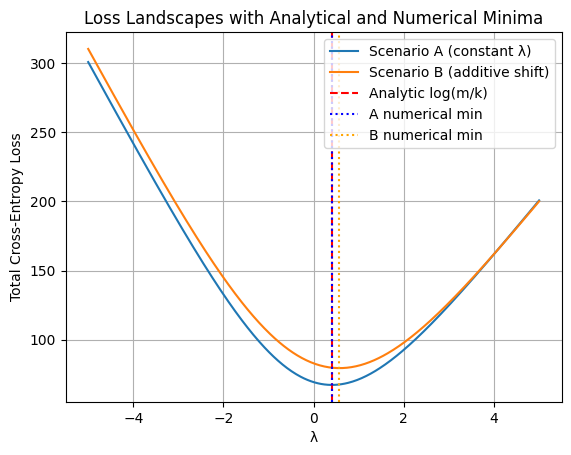

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # sigmoid

# Provided parameters
m = 60  # number of positive labels
k = 40  # number of negative labels
n = m + k

# Generate labels: m ones and k zeros
y = np.concatenate([np.ones(m), np.zeros(k)])

# Generate predictions f_i from a normal distribution
np.random.seed(42)
f = np.random.randn(n)

# Define range of lambda values
lambdas = np.linspace(-5, 5, 400)

# Compute total loss for Scenario A (constant lambda)
loss_A = [np.sum(-y * np.log(expit(l)) - (1 - y) * np.log(1 - expit(l))) for l in lambdas]

# Compute total loss for Scenario B (additive shift)
loss_B = [np.sum(-y * np.log(expit(f + l)) - (1 - y) * np.log(1 - expit(f + l))) for l in lambdas]

# Find numerical minima
idx_A = np.argmin(loss_A)
idx_B = np.argmin(loss_B)
lambda_min_A = lambdas[idx_A]
lambda_min_B = lambdas[idx_B]

# Analytic solution for Scenario A
analytic_lambda = np.log(m / k)

# Print comparison
print(f"Scenario A numerical λ*: {lambda_min_A:.5f}")
print(f"Scenario A analytic λ* = log(m/k): {analytic_lambda:.5f}")
print(f"Scenario B numerical λ*: {lambda_min_B:.5f}")

# Plot both Scenario A and B with minima
plt.figure()
plt.plot(lambdas, loss_A, label="Scenario A (constant λ)")
plt.plot(lambdas, loss_B, label="Scenario B (additive shift)")
plt.axvline(analytic_lambda, color="red", linestyle="--", label="Analytic log(m/k)")
plt.axvline(lambda_min_A, color="blue", linestyle=":", label="A numerical min")
plt.axvline(lambda_min_B, color="orange", linestyle=":", label="B numerical min")
plt.title("Loss Landscapes with Analytical and Numerical Minima")
plt.xlabel("λ")
plt.ylabel("Total Cross-Entropy Loss")
plt.legend()
plt.grid(True)
plt.show()


## Discussion

- **Simpler in A:**  
  In Scenario A every term in the loss is the same, $\sigma(\lambda)$, so

  $$
  \mathcal{L}_A(\lambda)
  = -m\ln\sigma(\lambda) - k\ln\bigl(1-\sigma(\lambda)\bigr)
  $$

  is a smooth, convex function of $\lambda$. Its first derivative:

  $$
  \frac{d\mathcal{L}_A}{d\lambda}
  = \sigma'(\lambda)\bigl[(m+k)\,\sigma(\lambda)-m\bigr]
  $$

  changes sign exactly once (at $\lambda = \ln(m/k)$), and the second derivative:

  $$
  \frac{d^2\mathcal{L}_A}{d\lambda^2} = \frac{e^\lambda}{(1 + e^\lambda)^2}
  $$

  is always positive. So the function is **unimodal**, with a global minimum at the closed-form solution $\lambda^* = \ln(m/k)$.

- **More complex form in B, but still unimodal:**  
  In Scenario B the loss

  $$
  \mathcal{L}_B(\lambda)
  = \sum_{i=1}^n L(y_i, f_i + \lambda)
  $$

  involves different offsets $f_i$ in each sigmoid. Although the shape depends on the distribution of $f_i$, the total loss is still **unimodal**, because $\sum_i \sigma(f_i + \lambda)$ is strictly increasing in $\lambda$.

- **Numerical minimization is required:**  
  The lack of a closed-form solution is due to the non-linear and non-separable nature of the equation:

  $$
  \sum_{i=1}^n \sigma(f_i + \lambda) = \sum_{i=1}^n y_i
  $$

  which cannot be solved analytically. However, because the function is continuous and well-behaved, the minimizer $\lambda^*$ can be found efficiently using numerical methods such as Newton–Raphson or Brent’s method.

- **Where the difficulty comes from:**  
  The challenge in Scenario B arises from the **non-linearity** of the sigmoid and the fact that $\lambda$ appears **inside many different shifted functions**, not from any irregularity in the loss landscape itself.
